###### Process Optimization of Photonic Curing for Perovskites on Willow Glass

### Batch 2 Data Analysis 
### Teacher model reproduce from the Group 2 analysis ensemble model

Weijie Xu (UT Dallas), 

In collaboration with Zhe Liu (NPU), 


V1.0 - 2022.09.13

Install Anaconda and open this notebook in Jupyter

Requires Emukit package and its dependent packages (pyDOE, GPy, etc.)

    e.g. pip intall emukit (maybe, pip install pyDOE)

Experimental information:
Batch 0: LHS batch is 16 experimental conditions 
Batch 1: acquisition batch is 8 experimental conditions from BO and 8 from LHS in the unknown region
    - Upper bound for PC length was extended to 100 ms. 
Batch 2: acquisition batch is 16 experimental conditions from BO
    - Resolution (or step) of MAPbI3 concentration to 0.05 M
    - Resolution (or step) of CH2I2 concentration to 5 uL
    - Lower bound for MAPbI3 concentration was extended to 1.2

Samples: 6 pixel cells per substrate, and 2 duplicates per condition

Parameter resolution (Finest grid we are able to/are willing to tune). 
- Molar Concentration MAPbI3 - 0.05 M
- Addition of CH2I2 - 5 uL
- PC voltage - no limit (willing to tune 1 V)
- PC pulse-length - no limit (willing to tune 0.1 ms)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## Import the dataset for the teacher model

In [2]:
df_data = pd.read_excel('./Group0_run1&2_J-V_Data_BM.xlsx')
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F
df_data = df_data.iloc[:158,:14]
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group0 = df_data
print('Group 0:', len(df_group0))

df_data = pd.read_excel('./Group1_run1&2_J-V_Data.xlsx')
df_data = df_data.iloc[:108,:14]
df_data['Condition'] = df_data['Condition']+16
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F')]
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group1 = df_data
print('Group 1:', len(df_group1))

df_data = pd.read_excel('./Group2_run1&2&3_J-V_Data.xlsx')
df_data = df_data.iloc[:216,:14]
#df_data = df_data.drop(columns = ['PCE Standard Deviation (per run, %)'])
#df_data = df_data[np.logical_or(df_data['Scan Direction'] == 0, df_data['Scan Direction'] == 'F')]
df_data = df_data.sort_values(by=list(df_data.iloc[:,[0,11]].columns)).drop_duplicates('Condition', 
                                                                                        keep = 'last', 
                                                                                        ignore_index = True)
df_group2 = df_data
print('Group 2:', len(df_group2))


df_data = pd.concat([df_group0, df_group1,df_group2], ignore_index = True)
df_data

Group 0: 16
Group 1: 16
Group 2: 16


,Condition,MAPbI Conc [M],CH2I2 Conc [uL],Final Conc [M],PC voltage [V],PC length [ms],Sample,Diode,Voc [V],Jsc [mA/cm2],FF,PCE [%],Scan Direction,Run
0,0,1.60,150,1.319626,433,18.3,0,1.0,0.000,0.00,0.000,0.00,F,1.0
1,1,1.50,50,1.400794,222,17.1,1,2.0,0.907,2.15,0.520,1.02,R,1.0
2,2,1.50,100,1.313896,373,6.3,2,2.0,0.768,16.03,0.622,7.66,F,1.0
3,3,1.30,100,1.138710,252,11.1,3,4.0,0.712,2.69,0.456,0.87,F,1.0
4,4,1.60,100,1.401489,237,9.9,4,4.0,0.859,1.59,0.507,0.69,F,1.0
5,5,1.50,50,1.400794,358,12.3,5,3.0,0.476,17.20,0.413,3.38,F,2.0
6,6,1.40,0,1.400000,312,15.9,6,2.0,0.845,13.63,0.536,6.17,R,1.0
7,7,1.50,250,1.107741,328,19.5,7,1.0,0.991,16.59,0.656,10.78,F,2.0
8,8,1.60,200,1.246799,297,2.7,8,3.0,0.928,6.82,0.595,3.77,F,2.0
9,9,1.40,200,1.090949,267,7.5,9,6.0,0.935,4.08,0.498,1.90,F,1.0


In [3]:
df = df_data.iloc[:48,[1,2,4,5,8,9,10,11]]
df.columns = ['MAPbI Conc [M]', "CH₂I₂ Conc [μL]", "PC voltage [V]", 
              'PC length [ms]', 'Voc [V]', 'Jsc [mA/cm²]','FF [%]','PCE [%]']
for i in np.arange(len(df)):
    if df['PCE [%]'].values[i] == 0:
        df.iloc[i,7]=0.5
    if df['PCE [%]'].values[i] == 'bad':
        df.iloc[i,7]=0.5

df

,MAPbI Conc [M],CH₂I₂ Conc [μL],PC voltage [V],PC length [ms],Voc [V],Jsc [mA/cm²],FF [%],PCE [%]
0,1.60,150,433,18.3,0.000,0.00,0.000,0.50
1,1.50,50,222,17.1,0.907,2.15,0.520,1.02
2,1.50,100,373,6.3,0.768,16.03,0.622,7.66
3,1.30,100,252,11.1,0.712,2.69,0.456,0.87
4,1.60,100,237,9.9,0.859,1.59,0.507,0.69
5,1.50,50,358,12.3,0.476,17.20,0.413,3.38
6,1.40,0,312,15.9,0.845,13.63,0.536,6.17
7,1.50,250,328,19.5,0.991,16.59,0.656,10.78
8,1.60,200,297,2.7,0.928,6.82,0.595,3.77
9,1.40,200,267,7.5,0.935,4.08,0.498,1.90


## Define the parameter space

In [4]:
import emukit
import GPy
from emukit.core import ParameterSpace, ContinuousParameter, DiscreteParameter
from emukit.core.initial_designs.random_design import RandomDesign
from emukit.core.initial_designs.latin_design import LatinDesign

In [5]:
MAPbI_conc_min, MAPbI_conc_max, MAPbI_conc_step = [1.2, 1.6, 0.05]  # Unit: V 
### Give step a scaling factor of 0.1 to avoid numercial errors such as 1.7000002
MAPbI_conc_var = np.arange(MAPbI_conc_min, MAPbI_conc_max+MAPbI_conc_step*0.1, MAPbI_conc_step)
MAPbI_conc_num = len(MAPbI_conc_var)

CH2I2_conc_min, CH2I2_conc_max, CH2I2_conc_step = [0, 250, 5] ## Unit: μL
CH2I2_conc_var = np.arange(CH2I2_conc_min, CH2I2_conc_max+CH2I2_conc_step*0.1, CH2I2_conc_step)
CH2I2_conc_num = len(CH2I2_conc_var)

PC_volt_min, PC_volt_max, PC_volt_step = [200, 440, 1] ## Unit: V
PC_volt_var = np.arange(PC_volt_min, PC_volt_max+PC_volt_step*0.1, PC_volt_step) 
PC_volt_num = len(PC_volt_var)

PC_len_min, PC_len_max, PC_len_step = [1, 100, 0.1]  ## Unit: ms
PC_len_var = np.arange(PC_len_min, PC_len_max+PC_len_step*0.1, PC_len_step)
PC_len_num = len(PC_len_var)

var_array = [MAPbI_conc_var,
             CH2I2_conc_var, 
             PC_volt_var, 
             PC_len_var]

x_labels =  ["MAPbI Conc [M]",
             "CH₂I₂ Conc [μL]",
             "PC voltage [V]", 
             "PC length [ms]"]

def x_normalizer(X, var_array = var_array):
    
    def max_min_scaler(x, x_max, x_min):
        return (x-x_min)/(x_max-x_min)
    x_norm = []
    for x in (X):
        x_norm.append([max_min_scaler(x[i], 
                         max(var_array[i]), 
                         min(var_array[i])) for i in range(len(x))])
            
    return np.array(x_norm)

def x_denormalizer(x_norm, var_array = var_array):
    
    def max_min_rescaler(x, x_max, x_min):
        return x*(x_max-x_min)+x_min
    x_original = []
    for x in (x_norm):
           x_original.append([max_min_rescaler(x[i], 
                              max(var_array[i]), 
                              min(var_array[i])) for i in range(len(x))])

    return np.array(x_original)


def get_closest_value(given_value, array_list):
    absolute_difference_function = lambda list_value : abs(list_value - given_value)
    closest_value = min(array_list, key=absolute_difference_function)
    return closest_value
    
def get_closest_array(suggested_x, var_list):
    modified_array = []
    for x in suggested_x:
        modified_array.append([get_closest_value(x[i], var_list[i]) for i in range(len(x))])
    return np.array(modified_array)

In [6]:
parameter_space = ParameterSpace([ContinuousParameter('MAPbI_conc', 0-1/(MAPbI_conc_num-1)/2, 1+1/(MAPbI_conc_num-1)/2),
                                  ContinuousParameter('CH2I2_conc', 0-1/(CH2I2_conc_num-1)/2, 1+1/(CH2I2_conc_num-1)/2),
                                  ContinuousParameter('PC_volt', 0-1/(PC_volt_num-1)/2, 1+1/(PC_volt_num-1)/2),
                                  ContinuousParameter('PC_len', 0-1/(PC_len_num-1)/2, 1+1/(PC_len_num-1)/2),
                                  ])



In [7]:
x_exp = x_normalizer(df.iloc[:,0:4].values)
y_exp = np.transpose([df.iloc[:,-1].values])
X, Y = [x_exp, y_exp]

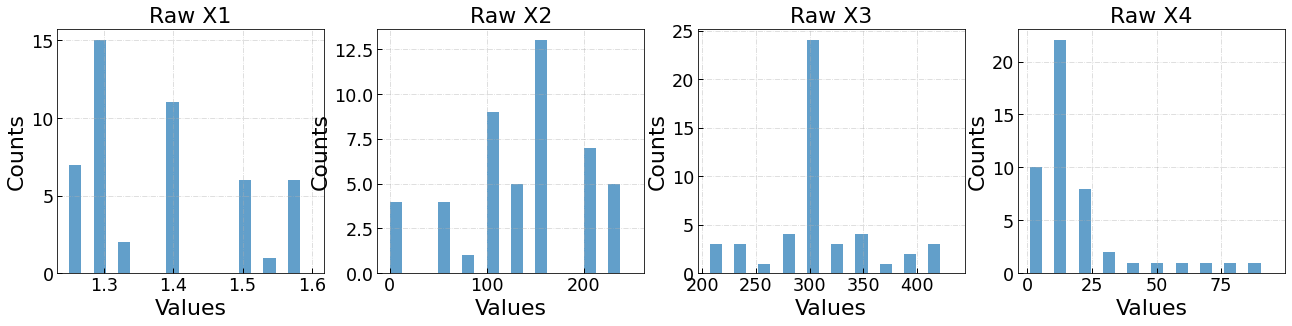

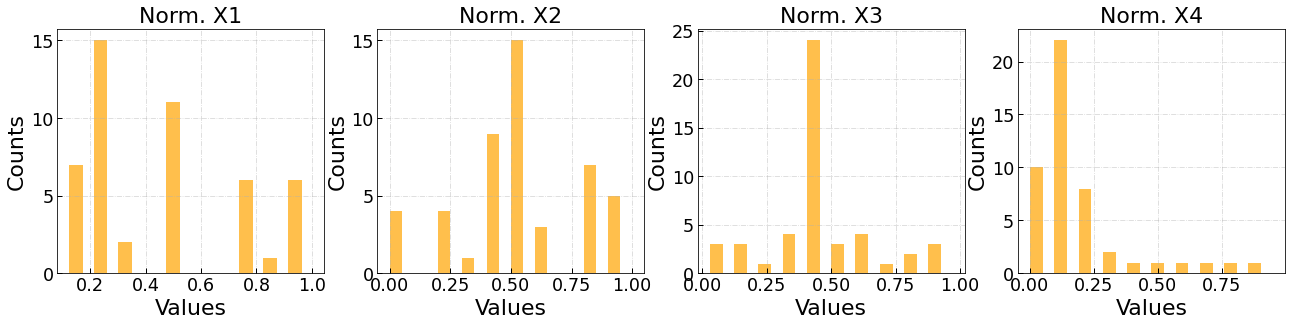

In [8]:
fig, axes = plt.subplots(1, 4, figsize=(5.5*4, 4.5))
fs = 22

for i in np.arange(4):
    max_min = (np.max(df.iloc[:, i].values)-np.min(df.iloc[:, i].values))
    axes[i].hist(np.array(df.iloc[:, i].values), bins =10, width = 0.05*max_min, alpha = 0.7)
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Raw X'+str(i+1), fontsize = fs)
plt.show()


fig, axes = plt.subplots(1, 4, figsize=(5.5*4, 4.5))
fs = 22

for i in np.arange(4):
    axes[i].hist(np.array(X[:, i]), bins =10, width = 0.05, alpha = 0.7, color = 'orange')
    axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
    axes[i].grid(True, linestyle='-.')
    axes[i].set_xlabel('Values', fontsize = fs)
    axes[i].set_ylabel('Counts', fontsize = fs)
    axes[i].set_title('Norm. X'+str(i+1), fontsize = fs)
plt.show()

## Data normalization

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import QuantileTransformer
#scalerY= StandardScaler() 
scalerY = QuantileTransformer(n_quantiles = 48)
y_norm =  scalerY.fit_transform(Y)

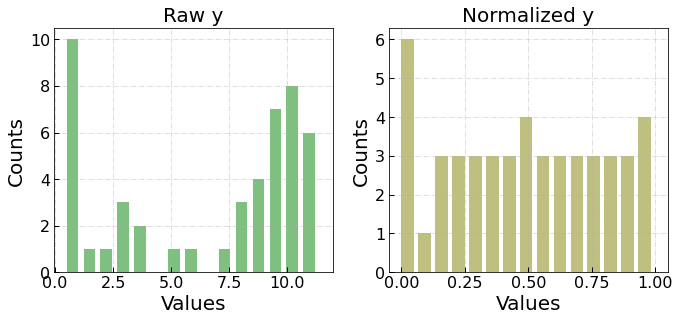

In [10]:
fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
fs = 20

ax = axes[0]
ax.hist(np.array(Y), bins =15, width = 0.5, alpha = 0.5, color = 'green')
ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')
ax.set_title('Raw y', fontsize = fs)
ax.set_xlabel('Values', fontsize = fs)
ax.set_ylabel('Counts', fontsize = fs)


ax = axes[1]
ax.hist(np.array(y_norm), bins =15, width = 0.05, alpha = 0.5, color = 'olive')
ax.tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
ax.grid(True, linestyle='-.')
ax.set_title('Normalized y', fontsize = fs)
ax.set_xlabel('Values', fontsize = fs)
ax.set_ylabel('Counts', fontsize = fs)

plt.show()

In [11]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import r2_score
from scipy.stats import spearmanr as spr

def plt_true_vs_pred (y_true_list, y_pred_list, title_str_list, color_list):
    fig, axes = plt.subplots(1, 2, figsize=(5.5*2, 4.5))
    fs = 18
    for i in np.arange(len(axes)):
        ## inverse transform 
        y_true = y_true_list[i]
        y_pred = y_pred_list[i]
        

        lims1 = (0*0.9, 5000*1.1)
        axes[i].scatter(y_true, y_pred, alpha = 0.6, c = color_list[i])
        axes[i].plot(lims1, lims1, 'k--', alpha=0.75, zorder=0)
        rmse_value = np.sqrt(mse(y_true, y_pred))
        mae_value = mae(y_true, y_pred)
        mape_value = mape(y_true, y_pred)
        spearman_value = spr(y_true, y_pred)[0]
        
        print(title_str_list[i],'RMSE:', np.around(rmse_value,3))
        print(title_str_list[i],'MAE:',  np.around(mae_value,3))
        print(title_str_list[i],'MAPE:',  np.around(mape_value,3))
        print(title_str_list[i],'spearman coeff.:',  np.around(spearman_value,3))


        title = title_str_list[i] + " (SPRMan=%.2f" % spearman_value+')'
        axes[i].set_xlabel('Ground Truth', fontsize = fs)
        axes[i].set_ylabel('Prediction', fontsize = fs)
        axes[i].set_title(title, fontsize = fs)
        axes[i].set_xlim(0,15)
        axes[i].set_ylim(0,15)
        #axes[i].set_yscale('log')
        #axes[i].set_xscale('log')

        axes[i].tick_params(direction='in', length=5, width=1, labelsize = fs*.8, grid_alpha = 0.5)
        axes[i].grid(True, linestyle='-.')

        
    plt.subplots_adjust(wspace = 0.4)
    plt.show()

### Random Forest Regression

In [12]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=21)

rf_regr = RandomForestRegressor(n_estimators=100, max_depth = 5)# criterion="squared_error",'absolute_error'
rf_regr.fit(X_train,y_train.ravel())
y_pred_train = rf_regr.predict(X_train)
y_pred_test = rf_regr.predict(X_test)


y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

RFR - Train RMSE: 1.28
RFR - Train MAE: 0.773
RFR - Train MAPE: 0.388
RFR - Train spearman coeff.: 0.98
RFR -  Test RMSE: 3.731
RFR -  Test MAE: 2.591
RFR -  Test MAPE: 2.342
RFR -  Test spearman coeff.: 0.701


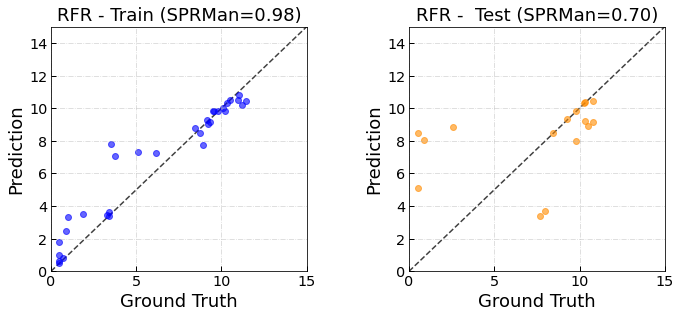

In [13]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['RFR - Train','RFR -  Test'],
                 ['blue', 'darkorange'])

### Gradient Boosting Regression

In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

gb_regr = GradientBoostingRegressor(n_estimators=30, max_depth = 3)#{‘squared_error’, ‘absolute_error’, ‘huber’, ‘quantile’}
gb_regr.fit(X_train,y_train.ravel())
y_pred_train = gb_regr.predict(X_train)
y_pred_test = gb_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))


GBDT - Train RMSE: 1.046
GBDT - Train MAE: 0.569
GBDT - Train MAPE: 0.201
GBDT - Train spearman coeff.: 0.977
GBDT -  Test RMSE: 3.255
GBDT -  Test MAE: 2.076
GBDT -  Test MAPE: 1.718
GBDT -  Test spearman coeff.: 0.824


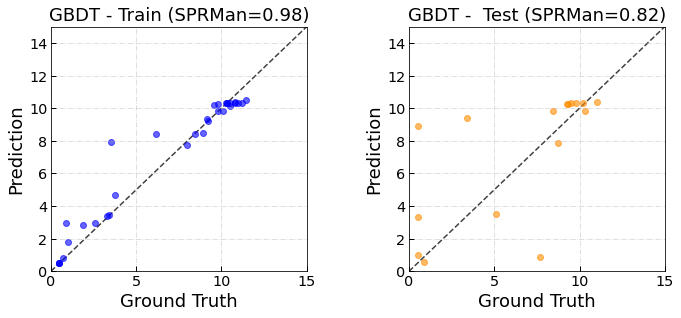

In [15]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['GBDT - Train','GBDT -  Test'],
                 ['blue', 'darkorange'])

### Neural Network Regression

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

NN_regr = MLPRegressor(hidden_layer_sizes = [56, 56, 56], alpha = 0.01, activation = 'relu',
                         max_iter = 2000, solver='adam',verbose=False,
                         tol=1e-8)
NN_regr.fit(X_train,y_train.ravel())
y_pred_train = NN_regr.predict(X_train)
y_pred_test = NN_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning:Stochastic Optimizer: Maximum iterations (2000) reached and the optimization hasn't converged yet.


NN - Train RMSE: 0.27
NN - Train MAE: 0.172
NN - Train MAPE: 0.033
NN - Train spearman coeff.: 0.995
NN -  Test RMSE: 3.586
NN -  Test MAE: 1.969
NN -  Test MAPE: 1.938
NN -  Test spearman coeff.: 0.481


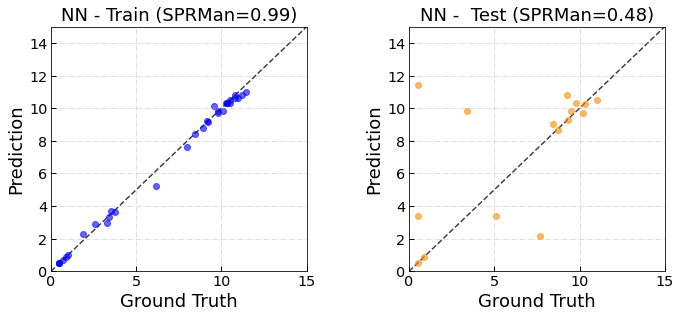

In [17]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['NN - Train','NN -  Test'],
                 ['blue', 'darkorange'])

### Gaussian Process Pregression

In [18]:
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.33, random_state=1)

ker = GPy.kern.Matern52(input_dim = 4, ARD =True)#
ker.lengthscale.constrain_bounded(1e-2, 1)
ker.variance.constrain_bounded(1e-2, 100.0)
gpy_regr = GPRegression(X_train,y_train, ker)#Emukit is a minimization tool; need to make Y negative
# gpy_regr.Gaussian_noise.variance = (0.5)**2
# gpy_regr.Gaussian_noise.variance.fix()
gpy_regr.randomize()
gpy_regr.optimize_restarts(num_restarts=20,verbose =False, messages=False)
print(ker.lengthscale)
print(ker.variance)
print(gpy_regr.Gaussian_noise)


y_pred_train, y_uncer_train= gpy_regr.predict(X_train)
y_pred_test, y_uncer_test = gpy_regr.predict(X_test)

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


  index  |  GP_regression.Mat52.lengthscale  |  constraints  |  priors
  [0]    |                       0.66796286  |   0.01,1.0    |        
  [1]    |                       0.66009947  |   0.01,1.0    |        
  [2]    |                       0.43818609  |   0.01,1.0    |        
  [3]    |                       0.17110992  |   0.01,1.0    |        
  index  |  GP_regression.Mat52.variance  |  constraints  |  priors
  [0]    |                    0.14547050  |  0.01,100.0   |        
  Gaussian_noise.  |                  value  |  constraints  |  priors
  variance         |  0.0038792339653598183  |      +ve      |        


GP - Train RMSE: 0.303
GP - Train MAE: 0.168
GP - Train MAPE: 0.042
GP - Train spearman coeff.: 0.993
GP -  Test RMSE: 3.466
GP -  Test MAE: 2.409
GP -  Test MAPE: 1.571
GP -  Test spearman coeff.: 0.677


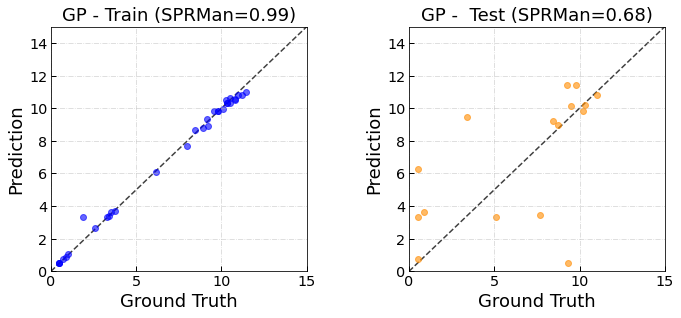

In [19]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['GP - Train','GP -  Test'],
                 ['blue', 'darkorange'])

## Random Forest of many regression models

### Train the model with all data

In [20]:
from sklearn.model_selection import train_test_split
## Train with all the data available before optimization 
X_train, X_test, y_train, y_test = train_test_split(X, y_norm, test_size = 0.01)

def regr_pred(regr_list, X):
    y_regr_pred = []
    i = 0
    for regr in regr_list:
        y_regr_pred.append(scalerY.inverse_transform(regr(X).reshape(-1,1)).ravel())
    return np.array(y_regr_pred)

def gpy_regr_predict(X, gpy_regr = gpy_regr):
    yc_pred, yc_uncer= gpy_regr.predict(X)
    return yc_pred.ravel()

regr_list = [NN_regr.predict, gb_regr.predict, rf_regr.predict, gpy_regr_predict]
rfr_reg_all = RandomForestRegressor(n_estimators=100, max_depth = 5)
rfr_reg_all.fit(np.transpose(regr_pred(regr_list, X_train)), y_train.ravel())
y_pred_train = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_train)))
y_pred_test = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_test)))

y_train_org = scalerY.inverse_transform(y_train.reshape(-1,1))
y_test_org = scalerY.inverse_transform(y_test.reshape(-1,1))
y_pred_train_org = scalerY.inverse_transform(y_pred_train.reshape(-1,1))
y_pred_test_org = scalerY.inverse_transform(y_pred_test.reshape(-1,1))

RF Ensem - Train RMSE: 0.837
RF Ensem - Train MAE: 0.396
RF Ensem - Train MAPE: 0.101
RF Ensem - Train spearman coeff.: 0.988
RF Ensem -  Test RMSE: 0.19
RF Ensem -  Test MAE: 0.19
RF Ensem -  Test MAPE: 0.275
RF Ensem -  Test spearman coeff.: nan


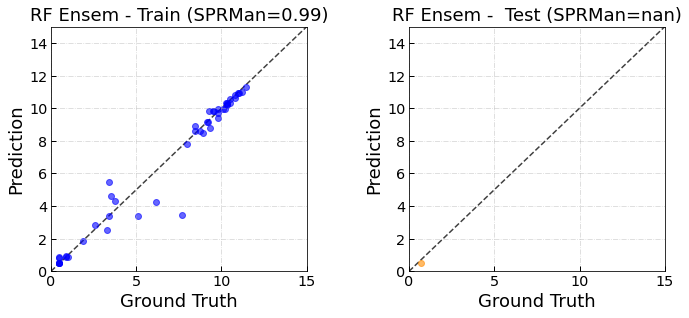

In [21]:
plt_true_vs_pred([y_train_org, y_test_org], 
                 [y_pred_train_org, y_pred_test_org], 
                 ['RF Ensem - Train','RF Ensem -  Test'],
                 ['blue', 'darkorange'])

### Use PSO to find the maximum

In [26]:
from pyswarm import pso
# Define bounds
# X_upper_bounds = [np.max(X[:,0]), np.max(X[:,1]), np.max(X[:,2]), np.max(X[:,3])]
# X_lower_bounds = [np.min(X[:,0]), np.min(X[:,1]), np.min(X[:,2]), np.min(X[:,3])]
X_upper_bounds = [1,1,1,1]
X_lower_bounds = [0,0,0,0]
def objective(X):
    """We want to maximize y (which means minimize -y)"""
    y_pred = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, np.array([X]))))
    y_pred_org =  scalerY.inverse_transform(y_pred.reshape(-1,1))
    return -y_pred_org

# Run PSO 5 times with some generic hyper-parameters
X_opts = []
y_opts = []
n_runs = 3
for n in range(n_runs):
    print('running iteration No.', n+1)
    X_opt, _ = pso(
        objective, X_lower_bounds, X_upper_bounds,
        swarmsize=100, maxiter=100)
    X_opts.append(X_opt)
    y_opt = -objective(X_opt)
    y_opts.append(y_opt)
    print('optimized y: ', y_opt[0][0])
X_opts = np.asarray(X_opts)
y_opts = np.asarray(y_opts)
y_opt = np.max(y_opts)
X_opt = x_denormalizer([X_opts[np.argmax(y_opts)]])[0]

print('y_opt = ', np.around(y_opt,2))
print('X_opt = ', np.around(X_opt,2))

running iteration No. 1
Stopping search: maximum iterations reached --> 100
optimized y:  11.128800000000004
running iteration No. 2
Stopping search: maximum iterations reached --> 100
optimized y:  11.288266666666667
running iteration No. 3
Stopping search: maximum iterations reached --> 100
optimized y:  11.117300000000004
y_opt =  11.29
X_opt =  [  1.36 181.15 287.04  23.93]


### Create the Bayesian Optimization Loop

In [27]:
from typing import Union
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable
from emukit.core.loop import FixedIntervalUpdater, OuterLoop, SequentialPointCalculator
from emukit.core.loop.loop_state import create_loop_state
from emukit.core.optimization import AcquisitionOptimizerBase
from emukit.core.optimization import GradientAcquisitionOptimizer
from emukit.bayesian_optimization.acquisitions.log_acquisition import LogAcquisition
from emukit.bayesian_optimization.local_penalization_calculator import LocalPenalizationPointCalculator
from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, \
                                                      NegativeLowerConfidenceBound, \
                                                      MaxValueEntropySearch, \
                                                      MultipointExpectedImprovement,\
                                                      ProbabilityOfFeasibility
from emukit.core.acquisition import IntegratedHyperParameterAcquisition

class ProbabilisticConstraintBayesianOptimizationLoop2(OuterLoop):
    def __init__(self, space: ParameterSpace, model_objective: Union[IModel, IDifferentiable],
                 model_constraint1: Union[IModel, IDifferentiable], 
                 model_constraint2: Union[IModel, IDifferentiable],
                 acquisition: Acquisition = None,
                 update_interval: int = 1, batch_size: int = 1):

        """
        Emukit class that implements a loop for building Bayesian optimization with an unknown constraint.
        For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param space: Input space where the optimization is carried out.
        :param model_objective: The model that approximates the underlying objective function
        :param model_constraint: The model that approximates the unknown constraints
        :param acquisition: The acquisition function for the objective function (default, EI).
        :param update_interval:  Number of iterations between optimization of model hyper-parameters. Defaults to 1.
        :param batch_size: How many points to evaluate in one iteration of the optimization loop. Defaults to 1.
        """

#         if not np.all(np.isclose(model_objective.X, model_constraint.X)):
#             raise ValueError('Emukit currently only supports identical '
#                              'training inputs for the constrained and objective model')
        self.model_objective = model_objective
        self.model_constraint1 = model_constraint1
        self.model_constraint2 = model_constraint2
        
        if acquisition is None:
            acquisition = ExpectedImprovement(model_objective)
        
        acquisition_constraint1 = ScaledProbabilityOfFeasibility(model_constraint1, max_value = 1, min_value = 0.5)
        acquisition_constraint2 = ScaledProbabilityOfFeasibility(model_constraint2, max_value = 1, min_value = 0.8)
        acquisition_constraint = acquisition_constraint1*acquisition_constraint2
        acquisition_constrained = acquisition * acquisition_constraint

        model_updater_objective = FixedIntervalUpdater(model_objective, update_interval)
        model_updater_constraint1 = FixedIntervalUpdater(model_constraint1, update_interval,
                                                        lambda state: state.Y_constraint1)
        model_updater_constraint2 = FixedIntervalUpdater(model_constraint2, update_interval,
                                                        lambda state: state.Y_constraint2)

        acquisition_optimizer = GradientAcquisitionOptimizer(space)
        if batch_size == 1:
            candidate_point_calculator = SequentialPointCalculator(acquisition_constrained, acquisition_optimizer)
        else:
            
            log_acquisition = LogAcquisition(acquisition_constrained)
            candidate_point_calculator = LocalPenalizationPointCalculator(log_acquisition, acquisition_optimizer,
                                                                          model_objective, space, batch_size)
        loop_state = create_loop_state(model_objective.X, model_objective.Y)
        
        #loop_state = create_loop_state(model_objective.X, model_objective.Y, Y_constraint=model_constraint.Y)

        super(ProbabilisticConstraintBayesianOptimizationLoop2, self).__init__(candidate_point_calculator,
                                                                              [model_updater_objective, model_updater_constraint1,model_updater_constraint2],
                                                                              loop_state)
#     def suggest_next_locations(self):
#         return self.candidate_point_calculator.compute_next_points(self.loop_state)
    
#     def acquisition_evaluate(self, X: loop_sate.X):
#         return acquisition.evaluate(X), acquisition_constraint.evaluate(X), acquisition_constrained.evaluate(X)

In [28]:
from typing import Tuple, Union
import scipy.stats
import numpy as np
from emukit.core.acquisition import Acquisition
from emukit.core.interfaces import IModel, IDifferentiable

class ScaledProbabilityOfFeasibility(Acquisition):

    def __init__(self, model: Union[IModel, IDifferentiable], jitter: float = float(0),
                 max_value: float = float(1), min_value: float = float(0)) -> None:
        """
        This acquisition computes for a given input point the probability of satisfying the constraint
        C<0. For more information see:
        Michael A. Gelbart, Jasper Snoek, and Ryan P. Adams,
        Bayesian Optimization with Unknown Constraints,
        https://arxiv.org/pdf/1403.5607.pdf
        :param model: The underlying model that provides the predictive mean and variance for the given test points
        :param jitter: Jitter to balance exploration / exploitation
        """
        self.model = model
        self.jitter = jitter
        self.max_value = max_value
        self.min_value = min_value

    def evaluate(self, x: np.ndarray) -> np.ndarray:
        """
        Computes the probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: numpy array with the probability of satisfying the constraint at the points x.
        """
        mean, variance = self.model.predict(x)
        mean += self.jitter

        standard_deviation = np.sqrt(variance)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        return cdf*(self.max_value-self.min_value)+self.min_value

    def evaluate_with_gradients(self, x: np.ndarray) -> Tuple:
        """
        Computes the  probability of of satisfying the constraint C<0.
        :param x: points where the acquisition is evaluated, shape (number of points, number of dimensions).
        :return: tuple of numpy arrays with the probability of satisfying the constraint at the points x 
        and its gradient.
        """
        mean, variance = self.model.predict(x)
        standard_deviation = np.sqrt(variance)

        dmean_dx, dvariance_dx = self.model.get_prediction_gradients(x)
        dstandard_devidation_dx = dvariance_dx / (2 * standard_deviation)

        mean += self.jitter
        u = - mean / standard_deviation
        pdf = scipy.stats.norm.pdf(0, mean, standard_deviation)
        cdf = scipy.stats.norm.cdf(0, mean, standard_deviation)
        dcdf_dx = - pdf * (dmean_dx + dstandard_devidation_dx * u)

        return cdf*(self.max_value-self.min_value)+self.min_value, dcdf_dx

    @property
    def has_gradients(self):
        return isinstance(self.model, IDifferentiable)

### Start the First Run of the Batch-mode Bayesian Optimization

In [35]:
#np.random.seed(10)
import emukit
import GPy
from GPy.models import GPRegression
from emukit.model_wrappers import GPyModelWrapper

#from sklearn.preprocessing import StandardScaler

BO_list_LHS16 = []
for n in np.arange(100): # Remember to increase it to 100
    design = LatinDesign(parameter_space)
    x_LHS = design.get_samples(16) # normalized LHS results
    x_init =get_closest_array(x_denormalizer(x_LHS, var_array),var_array) # denormalized LHS results 
    X = x_normalizer(x_init)# normalized it again
    y_hat = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X))) #use RF Ensemble to predict normalized PCE
    y_pred_init = scalerY.inverse_transform(y_hat.reshape(-1,1)) #denormalized to be the predicted PCE
    max(y_pred_init)
    

    Y = y_pred_init
    
    input_dim = len(X[0])
    ker = GPy.kern.Matern52(input_dim = input_dim, ARD = True)
    ker.lengthscale.constrain_bounded(1e-1,1)
    ker.variance.constrain_bounded(1e-1,1000.0)
    model_gpy = GPRegression(X, -Y, ker)#Emukit is a minimization tool; need to make Y negative
    model_gpy.Gaussian_noise.variance = 0.5**2
    model_gpy.Gaussian_noise.variance.fix()
    model_gpy.randomize()
    model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)

    objective_model = GPyModelWrapper(model_gpy)

    from emukit.bayesian_optimization.loops import BayesianOptimizationLoop
    from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, NegativeLowerConfidenceBound, ProbabilityOfImprovement

    ## Expeceted Improvement (EI)
    ## acquisition = ExpectedImprovement(objective_model, jitter=.1)
    ## Lower Confidence Bound (LCB)
    acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)
    ## Maximum Value Entropy Search (MES)
    # acquisition = MaxValueEntropySearch(objective_model, parameter_space, grid_size = 10000*6)

    ## fully integreated acquisition
    # #acquisition_generator = lambda m: ExpectedImprovement(m, jitter=.1)
    # acquisition_generator = lambda m: NegativeLowerConfidenceBound(m, beta = 1)
    # acquisition_integrated = IntegratedHyperParameterAcquisition(objective_model, acquisition_generator)
    # acquisition = acquisition_integrated

    # Make loop and collect points
    bayesopt= BayesianOptimizationLoop(model=objective_model, 
                                     space=parameter_space, 
                                     acquisition=acquisition,
                                     batch_size = 16)#batchsize>16 to account for duplication

    X_new = bayesopt.candidate_point_calculator.compute_next_points(bayesopt.loop_state)

    f_acq = bayesopt.candidate_point_calculator.acquisition.acquisition.evaluate

    print('total condition no.:', len(X))
    print('total device no.:', len(bayesopt.loop_state.Y))
    print('maximum Y (PCE [%]): ', -np.min(np.transpose(np.round(bayesopt.loop_state.Y, 2))))

    X_all =np.append(X,X_new,axis = 0)

    y_hat = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_all))) #use RF Ensemble to predict normalized PCE
    y_pred = scalerY.inverse_transform(y_hat.reshape(-1,1)) #denormalized to be the predicted PCE
    
    df_Xall = pd.DataFrame(x_denormalizer(X_all), columns = df.columns[0:4])
    df_Xall['Efficiency [%]'] = y_pred
    
    for i in np.arange(6):
        X = x_normalizer(df_Xall.iloc[:,:4].values)
        Y = np.transpose([df_Xall.iloc[:,-1]])
        
        input_dim = len(X[0])
        ker = GPy.kern.Matern52(input_dim = input_dim, ARD = True)
        ker.lengthscale.constrain_bounded(1e-1,1)
        ker.variance.constrain_bounded(1e-1,1000.0)
        model_gpy = GPRegression(X, -Y, ker)#Emukit is a minimization tool; need to make Y negative
        model_gpy.Gaussian_noise.variance = 0.5**2
        model_gpy.Gaussian_noise.variance.fix()
        model_gpy.randomize()
        model_gpy.optimize_restarts(num_restarts=20,verbose =False, messages=False)

        objective_model = GPyModelWrapper(model_gpy)
        
        from emukit.bayesian_optimization.loops import BayesianOptimizationLoop
        from emukit.bayesian_optimization.acquisitions import ExpectedImprovement, NegativeLowerConfidenceBound, ProbabilityOfImprovement

        ## Expeceted Improvement (EI)
        ## acquisition = ExpectedImprovement(objective_model, jitter=.1)
        ## Lower Confidence Bound (LCB)
        acquisition = NegativeLowerConfidenceBound(objective_model, beta = 1)
        ## Maximum Value Entropy Search (MES)
        # acquisition = MaxValueEntropySearch(objective_model, parameter_space, grid_size = 10000*6)

        ## fully integreated acquisition
        # #acquisition_generator = lambda m: ExpectedImprovement(m, jitter=.1)
        # acquisition_generator = lambda m: NegativeLowerConfidenceBound(m, beta = 1)
        # acquisition_integrated = IntegratedHyperParameterAcquisition(objective_model, acquisition_generator)
        # acquisition = acquisition_integrated

        # Make loop and collect points
        bayesopt= BayesianOptimizationLoop(model=objective_model, 
                                     space=parameter_space, 
                                     acquisition=acquisition,
                                     batch_size = 16)#batchsize>16 to account for duplication
        
        print('total condition no.:', len(X))
        print('total device no.:', len(bayesopt.loop_state.Y))
        print('maximum Y (PCE [%]): ', -np.min(np.transpose(np.round(bayesopt.loop_state.Y, 2))))
        
        X_new = bayesopt.candidate_point_calculator.compute_next_points(bayesopt.loop_state)

        f_acq = bayesopt.candidate_point_calculator.acquisition.acquisition.evaluate
        
        X_all =np.append(X,X_new,axis = 0)
        
        y_hat = rfr_reg_all.predict(np.transpose(regr_pred(regr_list, X_all))) #use RF Ensemble to predict normalized PCE
        y_pred = scalerY.inverse_transform(y_hat.reshape(-1,1)) #denormalized to be the predicted PCE
        
        df_Xall = pd.DataFrame(x_denormalizer(X_all), columns = df.columns[0:4])
        df_Xall['Efficiency [%]'] = y_pred
    
    print(df_Xall.iloc[np.argmax( df_Xall['Efficiency [%]'].values):np.argmax( df_Xall['Efficiency [%]'].values)+1])
    
    BO_list_LHS16.append(df_Xall['Efficiency [%]'].values)

reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.49
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.84


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
83        1.447103            252.5      307.136563       22.875014   

    Efficiency [%]  
83       10.995933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.96


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.06


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
93        1.340419       212.732755      292.346437       24.981789   

    Efficiency [%]  
93       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.24
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.28


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
57        1.345113       225.811297      335.101611       26.846987   

    Efficiency [%]  
57           10.33  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.3


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.94


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.94


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.94


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
75        1.467086       233.017125      316.386805       18.225151   

    Efficiency [%]  
75       10.938137  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.82
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
42        1.405621            252.5      317.716056         26.8886   

    Efficiency [%]  
42       10.954458  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.84
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.5


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
55        1.444249       229.786136      288.717419        52.37191   

    Efficiency [%]  
55       10.496235  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.1
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
92        1.338996       197.823641      293.292438       25.521664   

    Efficiency [%]  
92       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.97
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
106        1.433415            252.5      302.042482       23.333447   

     Efficiency [%]  
106       11.002683  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.3
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.76


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.94


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
126        1.328096       220.928616      294.813571       23.515939   

     Efficiency [%]  
126       10.997879  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.29
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.6


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.6


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.73


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.8


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
116        1.352733       156.750993      292.776196       28.887707   

     Efficiency [%]  
116       10.798127  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.44
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.44


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.44


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.44


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.44


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
118           1.286       179.584634      315.591884       22.999808   

     Efficiency [%]  
118        10.99125  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.33
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.62


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.62


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.74


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
110        1.469398       189.345836      291.996171       53.761639   

     Efficiency [%]  
110       10.735775  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.41
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.442103            252.5      325.252635       22.613081   

     Efficiency [%]  
121       10.972183  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.33
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.51


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.06


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
96        1.395505       164.045874       295.78252       25.838859   

    Efficiency [%]  
96         11.0621  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.26
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
43        1.500578       183.920193      292.010416       54.216978   

    Efficiency [%]  
43       10.759072  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.67
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.67


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.67


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
127        1.350416       143.234737      294.510982        24.43001   

     Efficiency [%]  
127       10.843703  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.49
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
75        1.355596       168.944548      290.406412       24.746123   

    Efficiency [%]  
75       11.252167  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.18
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
108        1.368266            252.5      335.066408       23.645668   

     Efficiency [%]  
108       10.968667  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.19
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.1


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.1


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.1


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.1


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
62        1.346204       205.623809      291.075057       26.629516   

    Efficiency [%]  
62       11.098708  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.13
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.59


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.6


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
97        1.480797       192.136306      295.383663       55.881468   

    Efficiency [%]  
97       10.598122  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.55
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
80        1.346678       224.097372       298.46443       26.088471   

    Efficiency [%]  
80       11.125733  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.16
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.1


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
94        1.334464       204.259951      290.117811       23.323682   

    Efficiency [%]  
94       11.131692  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  8.99
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.26


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.55


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.76


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
48        1.482822       182.844812       291.67699       55.246732   

    Efficiency [%]  
48       10.759072  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.2
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.2


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.78


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.78


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
112        1.462108       211.161315      295.963257       24.015605   

     Efficiency [%]  
112       11.069383  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.18


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.73


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.02


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
119         1.40128       160.058595      286.481132       21.959998   

     Efficiency [%]  
119         11.1035  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.31


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
83        1.313605       220.003089       291.91493       58.800681   

    Efficiency [%]  
83       10.329917  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.15


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.1


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.331393       204.537546      292.009786       24.740141   

     Efficiency [%]  
121       11.252167  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.4
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
23        1.430997       226.765396      287.130762       51.869572   

    Efficiency [%]  
23       10.496235  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.6
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
76        1.442039            252.5      314.036011       22.594803   

    Efficiency [%]  
76       10.987933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.49
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.07


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.07


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.07


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.07


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.07


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
43        1.457137        224.11625      292.318521       22.878607   

    Efficiency [%]  
43       11.069383  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.8
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.3


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.3


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.449859       221.220179      348.349694       25.002588   

     Efficiency [%]  
121       10.311415  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.27
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.51


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
126        1.460101       186.791932      299.150946       55.655759   

     Efficiency [%]  
126       10.545922  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.97
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
96        1.408619       179.444482      293.333271       25.822333   

    Efficiency [%]  
96         11.1288  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.21
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.78


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
97        1.459749       236.697799      302.813523       23.727005   

    Efficiency [%]  
97       10.995933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.8
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.48


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.73


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.04


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.13


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.24


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.24


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
116        1.361055       155.883145      288.849949       22.424551   

     Efficiency [%]  
116       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.25
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.28


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.28


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
95        1.443383       214.883814      292.558969       49.351789   

    Efficiency [%]  
95       10.516535  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.95
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.29


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
118        1.341693       175.204706      326.218677       23.811685   

     Efficiency [%]  
118       10.326272  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
53        1.356129       185.772398      290.546984       25.743418   

    Efficiency [%]  
53         11.1288  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.19
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
38        1.316004       214.856748      290.210758       45.511987   

    Efficiency [%]  
38           10.33  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.72
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.8


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.95


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
62         1.39892       232.397653      291.242288       26.353512   

    Efficiency [%]  
62       11.089125  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.64
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.19


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
94        1.315504       184.946203       294.21412       23.527509   

    Efficiency [%]  
94       11.271167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.72
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.96


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
75        1.311981       217.840753      300.989822       25.839232   

    Efficiency [%]  
75       10.993542  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.86
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
69        1.371348       238.502492      303.481224       25.634192   

    Efficiency [%]  
69       10.979833  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.3
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.55


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
108         1.42678       217.504983      291.084805       26.191868   

     Efficiency [%]  
108         11.1173  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.89


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
76        1.306873       177.359171      304.710598        23.63671   

    Efficiency [%]  
76        10.99125  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.77
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
69        1.463027       173.402354      297.230833       24.386999   

    Efficiency [%]  
69         11.0138  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.27
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.45


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.6


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
127        1.345982        233.69908      298.835639       27.030916   

     Efficiency [%]  
127       10.983208  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.12


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.17


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
108        1.493444       204.124622      292.455034       52.679881   

     Efficiency [%]  
108       10.515472  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.2
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
117        1.397624            252.5      308.410685       23.373948   

     Efficiency [%]  
117       10.989417  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.38
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.91


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
115        1.341706       196.262959      291.130853       24.959942   

     Efficiency [%]  
115       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.24
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.55


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.55


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.55


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
79        1.406282       232.623157      295.643342       25.347666   

    Efficiency [%]  
79         11.0506  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.22
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.72


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
66        1.502835       181.514893      289.982518       57.229606   

    Efficiency [%]  
66       10.754722  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.16
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
122        1.457665        196.85802      287.520824       54.827801   

     Efficiency [%]  
122       10.531325  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.86


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.48


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.48


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.57


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.57


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.57


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
127        1.406032       207.810229      297.826015       25.777544   

     Efficiency [%]  
127       10.956667  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.52


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.52


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
97        1.404701       179.276403      289.925714       51.013928   

    Efficiency [%]  
97       10.519435  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.48


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.85


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.85


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
100         1.45034       186.369232      299.945789        26.72811   

     Efficiency [%]  
100       10.989808  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.22
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.22


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.22


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.05


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
66        1.479263       216.499964      294.155805       22.379955   

    Efficiency [%]  
66       11.054817  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.348911       235.647738      297.991608       25.643079   

     Efficiency [%]  
121       11.064208  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.48
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.48


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.68


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.71


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.77


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.77


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.77


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
68        1.483488       180.871723      292.067106       54.905059   

    Efficiency [%]  
68       10.767675  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.18
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.98


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
89        1.412827            252.5      304.929427        23.94962   

    Efficiency [%]  
89       10.995933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.86
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
82        1.463236       179.302256      292.273661       22.844902   

    Efficiency [%]  
82         11.1173  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  8.91
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.14


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.18


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.31


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.31


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.31


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
67        1.367827       140.061327       298.94849       54.976048   

    Efficiency [%]  
67        10.31085  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.98
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.78


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.15


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.15


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
82        1.351379       170.287928      291.975497       25.090626   

    Efficiency [%]  
82       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.32
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.63


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.63


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.63


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.63


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
52        1.304122            252.5      330.722463       21.753739   

    Efficiency [%]  
52       10.629694  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.18
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.27


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.53


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
117        1.429625       198.474025      288.723102       27.714599   

     Efficiency [%]  
117       10.801093  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.12
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.06


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.06


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
101        1.347505       222.137453      294.580297       25.289036   

     Efficiency [%]  
101       11.213133  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.85
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
112        1.461323            252.5      316.737253       23.063655   

     Efficiency [%]  
112       10.995933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.11
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.71


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.71


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.71


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.79


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
125        1.415423       170.549944      294.666642       17.993235   

     Efficiency [%]  
125       10.958667  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.14
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.78


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.04


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
77        1.438791            252.5      297.016839       23.299704   

    Efficiency [%]  
77       11.089125  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.95
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.28


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.83


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
98        1.424049            252.5      330.763469       23.919897   

    Efficiency [%]  
98       10.972183  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.11
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.11


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.19


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.24


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.82


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
92        1.324901         247.3431      334.563121       23.923368   

    Efficiency [%]  
92        10.95617  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.97
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.03


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.03


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.03


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
67           1.443        230.88242      297.445284       25.948427   

    Efficiency [%]  
67       11.025875  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  11.0
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.02


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.02


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
49        1.367965       179.479447      286.332387       23.823988   

    Efficiency [%]  
49       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.86
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.5


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
102         1.44013       205.477968      293.289557       46.956908   

     Efficiency [%]  
102       10.496235  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.23
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.23


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
78        1.397425        234.94386      333.931941       26.747299   

    Efficiency [%]  
78       10.329423  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.27
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.84


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.84


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
71         1.34967       234.222343      287.296244       24.782173   

    Efficiency [%]  
71       10.976754  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.79
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.85


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.85


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
120        1.448373       245.413988      295.383668       23.405628   

     Efficiency [%]  
120       11.076475  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.13
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
62        1.480853       235.213292      313.593939       23.234246   

    Efficiency [%]  
62       10.995933  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.81
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.82


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.72


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.74


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.74


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.79


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.95


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
119        1.457374       244.517297       313.56026       21.729287   

     Efficiency [%]  
119       10.972183  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.14
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.94


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.57


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
110         1.44907        188.25471      298.473786       54.059822   

     Efficiency [%]  
110       10.565835  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  8.87
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.31


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.13


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.13


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.13


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
34        1.336259         201.3257      297.385671       26.336153   

    Efficiency [%]  
34       11.125733  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.62
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
28        1.447709       194.601302      299.594334        25.85481   

    Efficiency [%]  
28       11.002683  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.27
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
126        1.459283       197.427911      293.440119       24.117621   

     Efficiency [%]  
126       11.069383  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.24
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.58


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.88


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.93


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.12


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
109        1.436314       234.671411      293.764953        23.81844   

     Efficiency [%]  
109         11.1173  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.34
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.52


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.09


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
114        1.326732       176.887902      292.156632       24.020057   

     Efficiency [%]  
114       11.242033  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.18
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.26


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.69


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.69


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.69


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
70        1.479843       176.135296      290.376568       50.907889   

    Efficiency [%]  
70       10.692468  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.89
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
47        1.333551       242.255898      303.890897       26.350664   

    Efficiency [%]  
47       10.922592  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.67
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.32


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
62        1.327376        172.53002      327.842392       23.402744   

    Efficiency [%]  
62       10.324372  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.32
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.71


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.71


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.87


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
120        1.285601       195.582849      315.137849       23.234495   

     Efficiency [%]  
120       10.971833  


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.29
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.33


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.33


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.79


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.8


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
113        1.352891       176.292566      295.351867       25.780037   

     Efficiency [%]  
113       11.194733  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  11.0
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
125        1.320996       157.586313      299.183031       21.514255   

     Efficiency [%]  
125       11.192433  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.92
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.96


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.98


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
94        1.402051       231.889022      318.035374       27.002697   

    Efficiency [%]  
94       10.976667  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.16
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.16


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.88


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
107        1.443823       178.354708      300.089015       25.264333   

     Efficiency [%]  
107         11.0506  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.2
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  9.81


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.75


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.97


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
93        1.332022       243.258152      334.104031       23.949548   

    Efficiency [%]  
93       10.971833  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.11
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.349657       166.325361      292.516513         24.1952   

     Efficiency [%]  
121       11.242033  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.41
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.99


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
125        1.449342        246.01266      302.966055       22.466745   

     Efficiency [%]  
125       10.997417  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.8
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.21


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.54


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.54


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.13


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.13


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.18


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
117        1.359135       156.823813      288.392082        23.35728   

     Efficiency [%]  
117       11.252167  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.18
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.52


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.99


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.01


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


     MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
121        1.412007       238.725692      294.958291       23.197537   

     Efficiency [%]  
121         11.1173  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  10.32
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.92


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  11.0


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  11.0


 /Users/JeremyXu/opt/anaconda3/lib/python3.8/site-packages/emukit/bayesian_optimization/acquisitions/log_acquisition.py:25: RuntimeWarning:invalid value encountered in log
reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.05


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
78        1.436715         241.3305      297.377678       24.409565   

    Efficiency [%]  
78         11.0506  


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 16
total device no.: 16
maximum Y (PCE [%]):  9.46
total condition no.: 32
total device no.: 32
maximum Y (PCE [%]):  10.3


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 48
total device no.: 48
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 64
total device no.: 64
maximum Y (PCE [%]):  10.49


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 80
total device no.: 80
maximum Y (PCE [%]):  11.15


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 96
total device no.: 96
maximum Y (PCE [%]):  11.25


reconstraining parameters Mat52.lengthscale
reconstraining parameters Mat52.variance


total condition no.: 112
total device no.: 112
maximum Y (PCE [%]):  11.25
    MAPbI Conc [M]  CH₂I₂ Conc [μL]  PC voltage [V]  PC length [ms]  \
81        1.326338       187.319186      291.893546       23.693664   

    Efficiency [%]  
81       11.252167  


### Visualization of LHS Virtual Experiment

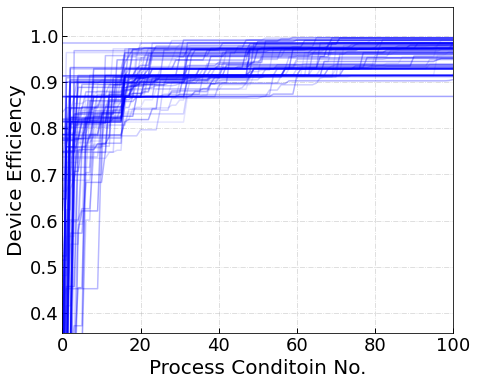

In [30]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
for df_i in BO_list_LHS16:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc)),eff_max_acc/y_opt, alpha = 0.3*i/len(BO_list_LHS16)+0.1, c = 'blue')
#plt.scatter(range(len(eff_max_acc)),eff_acc)
i
#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/np.max(BO_list_LHS16),12/y_opt) #Normalized the PCE based on the maximum value picked by PSO
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Device Efficiency', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
plt.show()

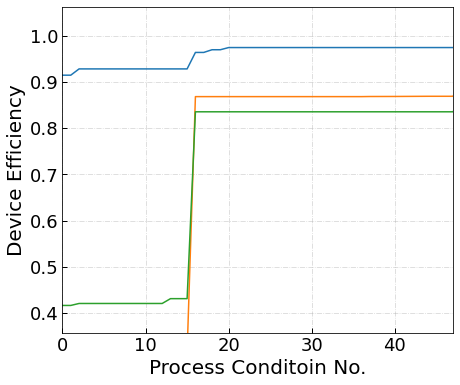

In [31]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
ax.plot(np.maximum.accumulate(np.percentile(BO_list_LHS16, 99, axis = 0))/y_opt)

ax.plot(np.maximum.accumulate(np.median(BO_list_LHS16, axis = 0))/y_opt)

ax.plot(np.maximum.accumulate(np.mean(BO_list_LHS16, axis = 0))/y_opt)

ax.plot(np.maximum.accumulate(np.percentile(BO_list_LHS16, 1, axis = 0))/y_opt)


axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/np.max(BO_list_LHS16),12/y_opt)
axes.set_xlim(0,47)

axes.grid(True, linestyle='-.')
axes.set_ylabel('Device Efficiency', fontsize = fs)
axes.set_xlabel('Process Conditoin No.', fontsize = fs)
plt.show()

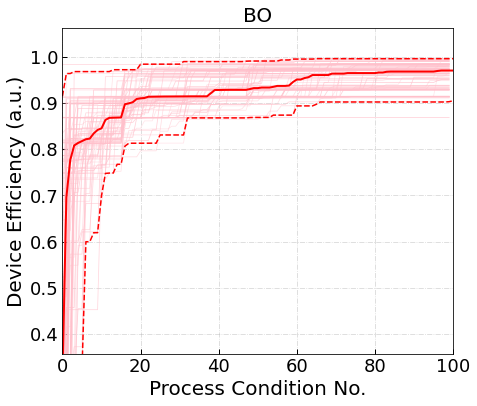

In [32]:
fs = 20
fig,axes = plt.subplots(1, 1, figsize=(7, 6), sharex = True)
ax = axes
i = 0
eff_max_runlist = []
for df_i in BO_list_LHS16:
    eff_max_acc = np.maximum.accumulate(df_i)
    eff_acc = df_i
    i = i +1
    ax.plot(range(len(eff_max_acc[:100])),eff_max_acc[:100]/y_opt, 
            alpha = 0.8*i/200+0.4, c = 'pink', linewidth=0.75)
    eff_max_runlist.append(eff_max_acc/y_opt)
#plt.scatter(range(len(eff_max_acc)),eff_acc)
line_95perc = np.percentile(eff_max_runlist, 99, axis = 0)
#ax.plot(np.percentile(eff_max_runlist, 95, axis = 0))
#ax.plot(np.percentile(eff_max_runlist, 99, axis = 0))
#ax.plot(np.mean(eff_max_runlist, axis = 0))
#ax.plot(np.percentile(eff_max_runlist, 50, axis = 0))
line_median = np.percentile(eff_max_runlist, 50, axis = 0)
#ax.plot(np.percentile(eff_max_runlist, 5, axis = 0))
line_5perc = np.percentile(eff_max_runlist, 1, axis = 0)

#axes.text(80, 9, 'One Var at at Time', fontsize=fs*0.9)
#axes.text(80, 8, 'total conds = '+str(len(convglen_list)), fontsize=15)
ax.plot(line_95perc,'--',c = 'red',linewidth=1.5)
ax.plot(line_median,'-', c = 'red', linewidth=2)
ax.plot(line_5perc,'--', c = 'red', linewidth=1.5)

axes.tick_params(direction='in', length=5, width=1, labelsize = fs*.9, grid_alpha = 0.5)
axes.set_ylim(4/np.max(BO_list_LHS16),12/y_opt)
axes.set_xlim(0,100)

axes.grid(True, linestyle='-.')
axes.set_title('BO', fontsize = fs)
axes.set_ylabel('Device Efficiency (a.u.)', fontsize = fs)
axes.set_xlabel('Process Condition No.', fontsize = fs)
plt.show()

In [36]:
BO_list_df = pd.DataFrame(np.transpose(BO_list_LHS16))
BO_list_df.to_excel("BO_benckmark_LHS16_20220916.xls")
BO_list_df

 <ipython-input-36-adce64afcc76>:2: FutureWarning:As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.


,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,3.210456,1.548105,3.339761,9.563540,1.017510,9.843168,8.459015,0.693092,8.443250,0.602901,...,0.972627,9.265682,0.996546,8.920719,0.882778,8.756490,0.939460,8.458418,8.460576,9.456368
1,8.721825,2.858000,0.883312,9.041349,0.500000,2.929010,9.104445,3.448928,3.405207,8.824670,...,0.889770,3.444431,0.500000,7.718377,0.500000,5.611552,9.803279,9.181870,0.500000,8.741457
2,6.009030,8.109463,8.449375,3.136179,9.464702,3.909224,0.853622,1.766838,3.176125,3.321847,...,0.500000,3.295081,0.500000,9.061918,8.043343,9.409170,4.026911,0.984498,0.692942,3.374170
3,8.025491,8.461412,3.513195,0.691292,3.339043,0.500000,0.757142,8.452073,0.500000,6.962242,...,9.289841,8.398286,9.341209,0.607764,1.203638,8.240855,8.626891,3.505037,0.500000,0.500000
4,5.965361,6.291240,4.621115,9.812874,1.464777,0.500000,7.209742,9.818192,3.408861,9.289218,...,0.886689,3.660203,10.158265,6.742144,7.843011,8.444076,1.057998,0.935417,3.285456,2.035237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,10.957504,11.076858,10.190434,10.831310,10.831310,10.486025,10.956667,9.845853,10.973670,10.647760,...,10.324372,10.878067,10.483432,10.325867,10.323770,9.363471,10.327041,11.080500,10.995933,10.999333
124,10.912517,10.983208,10.157389,10.818113,10.842360,10.325050,11.069383,9.801082,10.939492,10.735775,...,10.760377,10.886300,10.940250,10.327850,10.886300,10.970308,10.813260,10.971167,11.050600,11.134933
125,10.791960,11.034308,10.222511,10.815713,10.818113,10.484682,10.891283,10.972475,10.963667,10.789027,...,11.192433,10.920750,10.483532,10.822682,9.814441,10.997417,10.805227,10.487065,10.973058,11.122858
126,10.912560,11.002683,10.101551,10.813513,10.813513,10.325250,10.933652,10.971254,10.997879,10.131235,...,10.270945,10.224820,10.005496,10.888087,11.242033,9.817405,10.483897,10.956667,10.794547,11.009200
